#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [55]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [56]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [57]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [58]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [59]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [60]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [78]:
model = Sequential()

In [79]:
#卷積層1

In [80]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [81]:
model.add(Dropout(rate=0.25))

In [82]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [83]:
#卷積層2與池化層2

In [84]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [85]:
model.add(Dropout(0.25))

In [86]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [87]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [88]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [89]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [90]:
model.add(Dense(10, activation='softmax'))

In [91]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_15 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [36]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [92]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=10, batch_size=128, verbose=1)         


'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

Train on 37500 samples, validate on 12500 samples
Epoch 1/10
37500/37500 [==============================] - 74s 2ms/step - loss: 0.0909 - acc: 0.0995 - val_loss: 0.0901 - val_acc: 0.1016
Epoch 2/10
37500/37500 [==============================] - 79s 2ms/step - loss: 0.0904 - acc: 0.1021 - val_loss: 0.0900 - val_acc: 0.1126
Epoch 3/10
37500/37500 [==============================] - 81s 2ms/step - loss: 0.0902 - acc: 0.1032 - val_loss: 0.0899 - val_acc: 0.1207
Epoch 4/10
37500/37500 [==============================] - 141s 4ms/step - loss: 0.0901 - acc: 0.1088 - val_loss: 0.0898 - val_acc: 0.1271
Epoch 5/10
37500/37500 [==============================] - 78s 2ms/step - loss: 0.0900 - acc: 0.1143 - val_loss: 0.0898 - val_acc: 0.1357
Epoch 6/10
37500/37500 [==============================] - 83s 2ms/step - loss: 0.0899 - acc: 0.1195 - val_loss: 0.0897 - val_acc: 0.1486
Epoch 7/10
37500/37500 [==============================] - 79s 2ms/step - loss: 0.0897 - acc: 0.1265 - val_loss: 0.0896 - val_ac

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

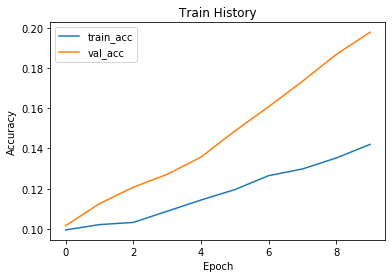

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()
show_train_history('acc','val_acc')

In [76]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=10, batch_size=128, verbose=1)         


'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

Train on 37500 samples, validate on 12500 samples
Epoch 1/10
37500/37500 [==============================] - 133s 4ms/step - loss: 0.3248 - acc: 0.9000 - val_loss: 0.3224 - val_acc: 0.9000
Epoch 2/10
37500/37500 [==============================] - 130s 3ms/step - loss: 0.3215 - acc: 0.9000 - val_loss: 0.3203 - val_acc: 0.9000
Epoch 3/10
37500/37500 [==============================] - 133s 4ms/step - loss: 0.3182 - acc: 0.9000 - val_loss: 0.3176 - val_acc: 0.9000
Epoch 4/10
37500/37500 [==============================] - 141s 4ms/step - loss: 0.3140 - acc: 0.9000 - val_loss: 0.3140 - val_acc: 0.9000
Epoch 5/10
37500/37500 [==============================] - 127s 3ms/step - loss: 0.3089 - acc: 0.9000 - val_loss: 0.3094 - val_acc: 0.9000
Epoch 6/10
37500/37500 [==============================] - 129s 3ms/step - loss: 0.3035 - acc: 0.9001 - val_loss: 0.3049 - val_acc: 0.9000
Epoch 7/10
37500/37500 [==============================] - 142s 4ms/step - loss: 0.2985 - acc: 0.9001 - val_loss: 0.3008 - 

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

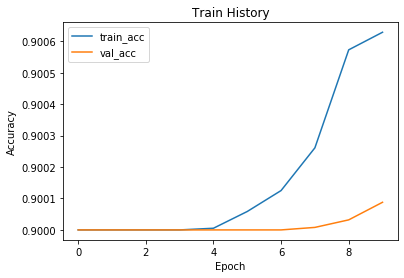

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()
show_train_history('acc','val_acc')